In [1]:

import os
import pandas as pd
import numpy as np
import re
import SimpleITK as sitk
import matplotlib.pyplot as plt
import gui
import preprocessing as pss

In [68]:
df_images = pd.read_csv('ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv')

In [69]:
df_images['DCMSerDescr'].value_counts().head(10)

ep2d_diff_tra_DYNDIST             795
t2_tse_tra                        412
t2_tse_sag                        358
t2_tse_cor                        339
tfl_3d PD ref_tra_1.5x1.5_t3      326
tfl_3d dynamisch fast             315
ep2d_diff_tra_DYNDIST_ADC         265
ep2d_diff_tra_DYNDISTCALC_BVAL    265
ep2d_diff_tra_DYNDIST_MIX         192
t2_loc sag                        151
Name: DCMSerDescr, dtype: int64

In [155]:
T2W = df_images[df_images['DCMSerDescr'] == 't2_tse_tra']

In [156]:
T2W

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
19,ProstateX-0001,t2_tse_tra0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0.5,1.02552e-010,-4.64581e-017,-119.205,-1.019...",157 186 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,6
20,ProstateX-0001,t2_tse_tra0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0.5,1.02552e-010,-4.64581e-017,-119.205,-1.019...",157 186 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,10
40,ProstateX-0002,t2_tse_tra0,2,-2.058 38.6752 -34.6104,"0.5,1.02552e-010,7.98512e-017,-103.784,-9.9634...",203 216 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
41,ProstateX-0002,t2_tse_tra0,1,-27.0102 41.5467 -26.0469,"0.5,1.02552e-010,7.98512e-017,-103.784,-9.9634...",154 217 12,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
60,ProstateX-0003,t2_tse_tra0,1,22.1495 31.2717 -2.45933,"0.5,1.02552e-010,3.21757e-017,-98.0005,-8.5615...",240 205 12,1.0,3.0,"0.5,0.5,3",384x384x21x1,t2_tse_tra,3
61,ProstateX-0003,t2_tse_tra0,2,-21.2871 19.3995 19.7429,"0.5,1.02552e-010,3.21757e-017,-98.0005,-8.5615...",153 161 17,1.0,3.0,"0.5,0.5,3",384x384x21x1,t2_tse_tra,3
71,ProstateX-0004,t2_tse_tra0,1,-7.69665 3.64226 23.1659,"0.5,1.02552e-010,6.33633e-017,-118.163,-9.9505...",221 168 7,1.0,4.5,"0.5,0.5,4.5",384x384x19x1,t2_tse_tra,5
94,ProstateX-0005,t2_tse_tra0,1,-22.0892639160156 25.4668045043945 22.87915420...,"0.5,1.02552e-010,1.10673e-016,-117.278,-1.0216...",190 185 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
95,ProstateX-0005,t2_tse_tra0,0,-14.5174331665039 49.4428329467773 20.78152465...,"0.5,1.02552e-010,1.10673e-016,-117.278,-1.0216...",206 233 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4


,ProxID,fid,pos,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False
5,ProstateX-0003,2,-21.2871 19.3995 19.7429,TZ,False
6,ProstateX-0004,1,-7.69665 3.64226 23.1659,AS,False
7,ProstateX-0005,0,-14.5174331665039 49.4428329467773 20.78152465...,PZ,True
8,ProstateX-0005,1,-38.6276 42.2781 21.4084,PZ,True
9,ProstateX-0005,1,-22.0892639160156 25.4668045043945 22.87915420...,TZ,False


In [134]:
ROOT_PATH = "C:\\FRANTISEK\\SKOLA FIIT\\bakalarka\\DATA\\PROSTATEx"

for index , row in T2W.iterrows():
    
    # get path to infividual patient 
    DICOM_PATH = os.path.join(ROOT_PATH, str(row['ProxID']))
    # list all directories in patient directory
    patient_dirs = os.listdir(DICOM_PATH)
    # join first dir with prefix
    DICOM_PATH = os.path.join(DICOM_PATH,patient_dirs[0])
    # list all directories that contain dicom series
    series_dirs = os.listdir(DICOM_PATH)
    # find directory 
    final_dir = next(filter(lambda x: x.startswith( str(row['DCMSerNum']) ),series_dirs))   
    # get the final path 
    DICOM_PATH = os.path.join(DICOM_PATH,final_dir)
    
    T2W.loc[index,'path'] = DICOM_PATH

In [135]:
def my_gen(df):
    for index,row in df.iterrows():
        
        image = pss.read_dicom_series(row['path'])
        ijk = [ int(x) for x in  row['ijk'].split()]
        
        point_acquisition_interface = gui.PointDataAquisition(image)
        print(ijk)
        print(row['ProxID'],', ',row['fid'])
        #preselected seed point in the left ventricle  
        point_acquisition_interface.set_point_indexes([ijk])
        yield
    
   

In [136]:
T2W_TOP = T2W.head(20)
a = my_gen(T2W_TOP)

[45, 60, 6]
ProstateX-0018 ,  1


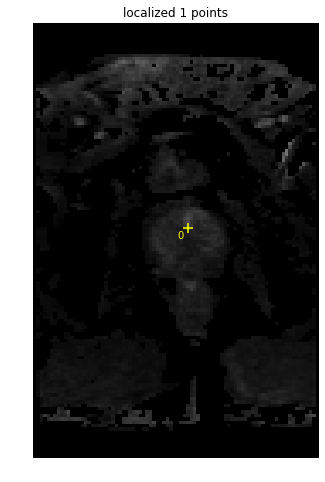

In [153]:
next(a)